In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [57]:
temp = pd.read_csv('data/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')

start_date = dt.datetime(1960, 1, 1)
end_date = dt.datetime(2015, 1, 1)


temp['dt'] = pd.to_datetime(temp['dt'])
mask = (temp['dt'] >= start_date) & (temp['dt'] < end_date)
temp = temp.loc[mask]
temp.set_index('dt', inplace=True)

temp.info()
display(temp)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 660 entries, 1960-01-01 to 2014-12-01
Data columns (total 8 columns):
LandAverageTemperature                       660 non-null float64
LandAverageTemperatureUncertainty            660 non-null float64
LandMaxTemperature                           660 non-null float64
LandMaxTemperatureUncertainty                660 non-null float64
LandMinTemperature                           660 non-null float64
LandMinTemperatureUncertainty                660 non-null float64
LandAndOceanAverageTemperature               660 non-null float64
LandAndOceanAverageTemperatureUncertainty    660 non-null float64
dtypes: float64(8)
memory usage: 46.4 KB


,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1960-01-01,2.713,0.086,8.222,0.113,-2.623,0.085,13.553,0.067
1960-02-01,3.798,0.125,9.748,0.081,-1.920,0.274,13.956,0.070
1960-03-01,4.303,0.077,10.216,0.092,-1.677,0.084,14.145,0.066
1960-04-01,8.133,0.088,13.955,0.137,2.229,0.104,15.190,0.066
1960-05-01,10.872,0.156,16.710,0.256,5.044,0.235,15.956,0.079
1960-06-01,13.484,0.080,19.306,0.227,7.729,0.105,16.670,0.071
1960-07-01,14.198,0.072,19.884,0.125,8.492,0.094,16.985,0.070
1960-08-01,13.825,0.079,19.604,0.177,8.242,0.165,16.969,0.069
1960-09-01,12.095,0.099,17.856,0.226,6.498,0.146,16.382,0.069


In [6]:
emissions = pd.read_csv('data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10081117/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10081117.csv', skiprows=4)
display(emissions)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,2.629239e+03,2.508228e+03,2.500894e+03,1.349456e+03,8.617450e+02,8.727460e+02,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,4.143710e+02,4.913780e+02,6.893960e+02,7.077310e+02,8.397430e+02,1.008425e+03,...,6.769282e+03,8.463436e+03,1.224045e+04,1.075531e+04,1.001458e+04,9.809225e+03,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,5.500500e+02,4.547080e+02,1.180774e+03,1.151438e+03,1.224778e+03,1.188108e+03,...,2.779219e+04,2.905731e+04,3.034076e+04,3.339904e+04,3.261797e+04,3.476316e+04,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,2.024184e+03,2.280874e+03,2.464224e+03,2.082856e+03,2.016850e+03,2.174531e+03,...,4.378398e+03,4.598418e+03,5.240143e+03,4.910113e+03,5.064127e+03,5.716853e+03,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,5.170470e+02,5.170470e+02,4.913780e+02,4.877110e+02,4.767100e+02,4.620420e+02,NaN,NaN,NaN,NaN
5,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,5.953540e+04,6.511982e+04,7.432201e+04,8.785379e+04,1.031467e+05,1.237688e+05,...,1.581328e+06,1.645559e+06,1.655808e+06,1.796962e+06,1.775096e+06,1.895700e+06,NaN,NaN,NaN,NaN
6,United Arab Emirates,ARE,CO2 emissions (kt),EN.ATM.CO2E.KT,1.100100e+01,1.100100e+01,1.833500e+01,2.200200e+01,1.833500e+01,2.200200e+01,...,1.679596e+05,1.608126e+05,1.654404e+05,1.763864e+05,1.707062e+05,2.113695e+05,NaN,NaN,NaN,NaN
7,Argentina,ARG,CO2 emissions (kt),EN.ATM.CO2E.KT,4.881510e+04,5.118032e+04,5.369588e+04,5.008389e+04,5.572740e+04,5.886635e+04,...,1.799617e+05,1.879191e+05,1.916338e+05,1.923562e+05,1.898516e+05,2.040245e+05,NaN,NaN,NaN,NaN
8,Armenia,ARM,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,4.360063e+03,4.217050e+03,4.917447e+03,5.694851e+03,5.496833e+03,5.529836e+03,NaN,NaN,NaN,NaN
9,American Samoa,ASM,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
emissions_data = pd.DataFrame()
emissions_data['world_emission'] = emissions[emissions["Country Code"] == "WLD"].squeeze()[4:-4]
emissions_data.index = pd.to_datetime(emissions_data.index)
emissions_data.info()
display(emissions_data)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1960-01-01 to 2014-01-01
Data columns (total 1 columns):
world_emission    55 non-null object
dtypes: object(1)
memory usage: 880.0+ bytes


,world_emission
1960-01-01,9.39671e+06
1961-01-01,9.4344e+06
1962-01-01,9.81884e+06
1963-01-01,1.03557e+07
1964-01-01,1.0947e+07
1965-01-01,1.14334e+07
1966-01-01,1.20094e+07
1967-01-01,1.23897e+07
1968-01-01,1.30172e+07
1969-01-01,1.37971e+07


In [60]:
temp = temp.join(emissions_data)
display(temp)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,world_emission
dt,,,,,,,,,
1960-01-01,2.713,0.086,8.222,0.113,-2.623,0.085,13.553,0.067,9.39671e+06
1960-02-01,3.798,0.125,9.748,0.081,-1.920,0.274,13.956,0.070,NaN
1960-03-01,4.303,0.077,10.216,0.092,-1.677,0.084,14.145,0.066,NaN
1960-04-01,8.133,0.088,13.955,0.137,2.229,0.104,15.190,0.066,NaN
1960-05-01,10.872,0.156,16.710,0.256,5.044,0.235,15.956,0.079,NaN
1960-06-01,13.484,0.080,19.306,0.227,7.729,0.105,16.670,0.071,NaN
1960-07-01,14.198,0.072,19.884,0.125,8.492,0.094,16.985,0.070,NaN
1960-08-01,13.825,0.079,19.604,0.177,8.242,0.165,16.969,0.069,NaN
1960-09-01,12.095,0.099,17.856,0.226,6.498,0.146,16.382,0.069,NaN


In [61]:
temp.to_csv('data/temp_emissions_1960_2014.csv')

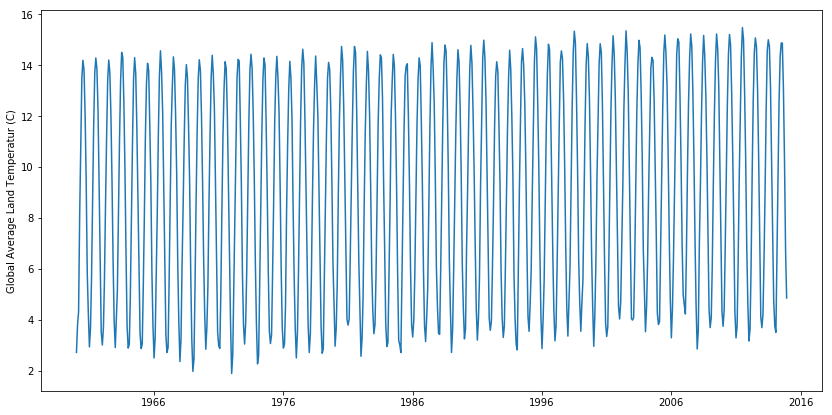

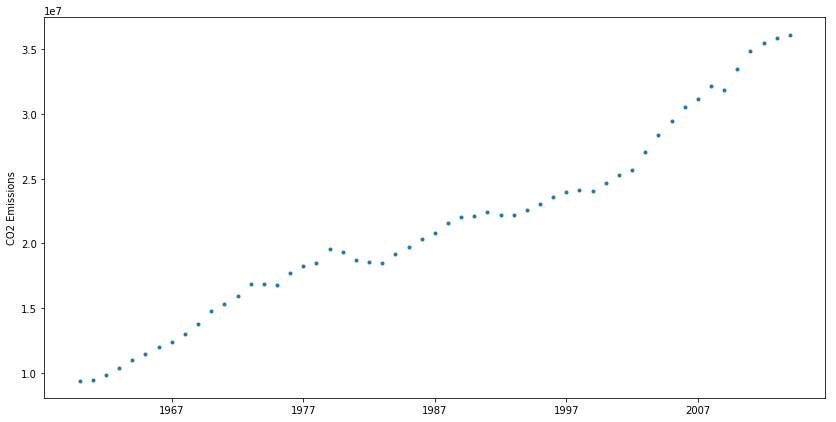

In [79]:
fig = plt.figure(figsize=(14, 7))
plt.plot(temp.index, temp['LandAverageTemperature'])
plt.ylabel('Global Average Land Temperatur (C)')

fig = plt.figure(figsize=(14, 7))
plt.ylabel('CO2 Emissions')
plt.plot(temp.index, temp['world_emission'],'.', )